In [2]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.DataFrame([
    {"x":0.1, "y":0.4},
    {"x":0.2, "y":0.2},
    {"x":0.3, "y":0.1},
    {"x":0.4, "y":0.3}
])
df

,x,y
0,0.1,0.4
1,0.2,0.2
2,0.3,0.1
3,0.4,0.3


[[0.1 0.4]
 [0.2 0.2]
 [0.3 0.1]
 [0.4 0.3]]


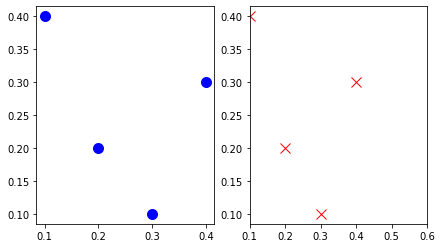

In [4]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7, 4))
ax2.set_xlim(0.1, 0.6)

points = df[["x", "y"]].values
print(points)

def scatter1(ax, points, style="bo", size=10):
    for x, y in points:
        ax.plot(x, y, style, markersize=size)
def scatter2(ax, points, style="rx", size=10):
    for x, y in points:
        ax.plot(x, y, style, markersize=size)

scatter1(ax1, points)
scatter2(ax2, points)
# scatter(ax2, points, ????) # TODO: make large red X's
fig.savefig("good.png", bbox_inches=None)
fig.savefig("bad.png", bbox_inches="tight")

In [5]:
from numpy.random import normal
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams["font.size"] = 16

df = pd.DataFrame({
    "X": normal(10, 20, 100),
    "Y": normal(15, 20, 100),
    "Z": normal(5, 5, 100),
}, index=range(0,100)).cumsum()

df

,X,Y,Z
0,26.551811,16.781392,6.101255
1,66.897488,18.215708,15.009622
2,89.275179,58.819924,23.821143
3,51.590194,97.862513,37.834335
4,91.709126,94.181508,41.701348
...,...,...,...
95,947.173537,1889.393260,387.000250
96,967.133246,1923.261532,398.174669
97,930.031837,1926.344688,401.166170
98,955.711809,1931.390721,402.614802


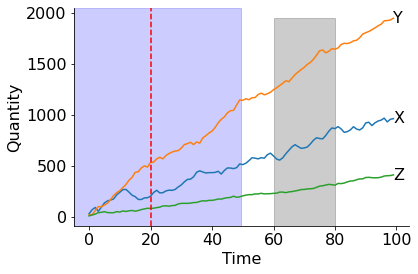

In [33]:
def labeled_lines(df, xlabel="label me", ylabel="label me"):
    ax = df.plot.line(legend=False)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    patch = plt.Line2D([20, 20], ax.get_ylim(), color='r', linestyle='--')
    ax.add_artist(patch)
    
    patch = plt.Rectangle([60,ax.get_ylim()[0]], 20, ax.get_ylim()[1], color='k', zorder=-5, alpha=0.2, transform=ax.transData)
    ax.add_artist(patch)
    
    patch = plt.Rectangle([0,0], 0.5, 1, color='b', zorder=-5, alpha=0.2, transform=ax.transAxes)
    ax.add_artist(patch)
    
    last_x = df.index[-1]
    for i in range(len(df.columns)):
        last_y = df.iloc[-1, i]
        line_name = df.columns[i]
        ax.text(last_x, last_y, line_name, va="center", ha="left")
    return ax

labeled_lines(df,'Time', 'Quantity')

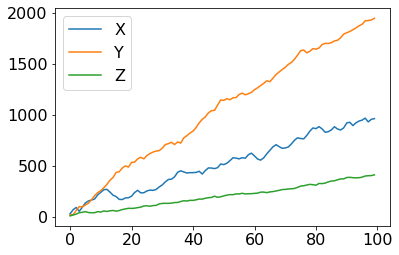

In [7]:
df.plot.line()

NameError: name 'ax' is not defined

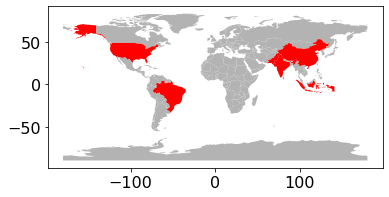

In [37]:
import geopandas
import os
world_df = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
world_df = world_df[world_df["continent"] != "Oceania"]
world_df["color"] = "0.7"
world_df.loc[world_df["pop_est"] > 2e8, "color"] = "red"
world_df.plot(color=world_df["color"])
ax.set_axis_off()

In [46]:
world_path =geopandas.datasets.get_path("naturalearth_lowres")
cities_path =geopandas.datasets.get_path("naturalearth_cities")
cities_path

'/home/hp/.local/lib/python3.6/site-packages/geopandas/datasets/naturalearth_cities/naturalearth_cities.shp'

In [41]:
os.listdir('/home/hp/.local/lib/python3.6/site-packages/geopandas/datasets')

['__init__.py',
 '__pycache__',
 'naturalearth_lowres',
 'naturalearth_creation.py',
 'nybb_16a.zip',
 'naturalearth_cities']

In [47]:
world_df = geopandas.read_file(world_path)
cities_df = geopandas.read_file(cities_path)

In [48]:
cities_df.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


In [49]:
world_df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [50]:
type(world_df).__mro__

(geopandas.geodataframe.GeoDataFrame,
 geopandas.base.GeoPandasBase,
 pandas.core.frame.DataFrame,
 pandas.core.generic.NDFrame,
 pandas.core.base.PandasObject,
 pandas.core.accessor.DirNamesMixin,
 pandas.core.base.SelectionMixin,
 pandas.core.indexing.IndexingMixin,
 object)

In [51]:
type(world_df['geometry']).__mro__

(geopandas.geoseries.GeoSeries,
 geopandas.base.GeoPandasBase,
 pandas.core.series.Series,
 pandas.core.base.IndexOpsMixin,
 pandas.core.generic.NDFrame,
 pandas.core.base.PandasObject,
 pandas.core.accessor.DirNamesMixin,
 pandas.core.base.SelectionMixin,
 pandas.core.indexing.IndexingMixin,
 object)

In [52]:
type(world_df['geometry'].iloc[0])

shapely.geometry.multipolygon.MultiPolygon

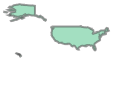

In [54]:
world_df['geometry'].iloc[4]

In [56]:
from shapely.geometry import Polygon

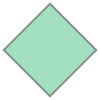

In [59]:
p = Polygon([[0,0], [1,1], [2,0], [1, -1]])
p

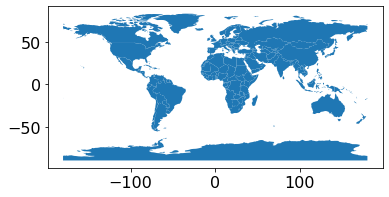

In [60]:
world_df['geometry'].plot()

In [61]:
world_df['geometry'].centroid

0      POINT (163.85316 -17.31631)
1        POINT (34.75299 -6.25773)
2       POINT (-12.13783 24.29117)
3       POINT (-98.14238 61.46908)
4      POINT (-112.59944 45.70563)
                  ...             
172      POINT (20.81965 44.23304)
173      POINT (19.28618 42.78904)
174      POINT (20.89536 42.57937)
175     POINT (-61.33037 10.42824)
176       POINT (30.19862 7.29289)
Length: 177, dtype: geometry

In [63]:
world_df['centers'] = world_df['geometry'].centroid
world_df.head(2)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,centers
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",POINT (163.85316 -17.31631)
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",POINT (34.75299 -6.25773)


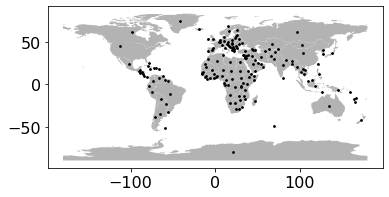

In [72]:
world_df = world_df.set_geometry('geometry')
ax = world_df.plot(color = '0.7')
world_df['geometry'].centroid.plot(ax = ax, color='k', markersize = 3)

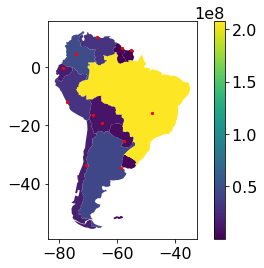

In [81]:
sa = world_df[world_df['continent']=='South America']
ax = sa.plot(column='pop_est', legend=True)
sa_cities = geopandas.sjoin(cities_df, sa)
sa_cities.plot(ax =ax, color='r', markersize=5)

In [79]:
geopandas.sjoin(cities_df, sa)

,name_left,geometry,index_right,pop_est,continent,name_right,iso_a3,gdp_md_est,centers
45,Georgetown,POINT (-58.16703 6.80197),41,737718,South America,Guyana,GUY,6093.0,POINT (-58.97120 4.79023)
49,Paramaribo,POINT (-55.16703 5.83503),42,591919,South America,Suriname,SUR,8547.0,POINT (-55.91146 4.12001)
52,Asuncion,POINT (-57.64345 -25.29446),156,6943739,South America,Paraguay,PRY,64670.0,POINT (-58.38739 -23.24804)
79,Quito,POINT (-78.50200 -0.21304),44,16290913,South America,Ecuador,ECU,182400.0,POINT (-78.38417 -1.45477)
104,Sucre,POINT (-65.25952 -19.04097),30,11138234,South America,Bolivia,BOL,78350.0,POINT (-64.64141 -16.72899)
112,La Paz,POINT (-68.15193 -16.49603),30,11138234,South America,Bolivia,BOL,78350.0,POINT (-64.64141 -16.72899)
157,Brasilia,POINT (-47.91800 -15.78139),29,207353391,South America,Brazil,BRA,3081000.0,POINT (-53.05434 -10.80677)
163,Caracas,POINT (-66.91898 10.50294),40,31304016,South America,Venezuela,VEN,468600.0,POINT (-66.16383 7.16213)
169,Lima,POINT (-77.05201 -12.04607),31,31036656,South America,Peru,PER,410400.0,POINT (-74.39181 -9.19156)
182,Buenos Aires,POINT (-58.39948 -34.60056),9,44293293,South America,Argentina,ARG,879400.0,POINT (-65.17536 -35.44682)
